# Assignment on NEISS DATA.
## AUTHOR : Bhagwat Singh Bisht
## Version 1

# Data cleaning : Largely dataset was clean and missing value were negligible. I converted the trmt_date to datetime format to be able to extract day out of it. 



In [1]:
## libraries required.

import numpy as np
import pandas as pd
import statsmodels.api as sm1
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## reading the datasets

Dia_code  = pd.read_csv('DiagnosisCodes.csv')
Disposition = pd.read_csv('Disposition.csv')
Body_part = pd.read_csv('BodyParts.csv')
N_data = pd.read_csv('NEISS2014.csv')

In [3]:
## looking at the data : Descriptive analysis 

## Since age is taken as three digit representation for all age smaller than 2 years
##  the discriptive statistics for age is misleading here

N_data.describe()

,CPSC Case #,psu,weight,age,diag,body_part,disposition,location,fmv,prod1,prod2
count,6.549900e+04,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,8446.000000
mean,1.411328e+08,46.551321,46.627602,43.224431,59.983618,64.188873,1.267775,2.403548,0.008122,2107.615735,1845.662207
std,1.993606e+06,27.253670,35.649986,48.191852,6.133152,24.066252,0.918464,3.194460,0.141298,1334.875187,1104.161811
min,1.401047e+08,1.000000,5.717400,0.000000,41.000000,0.000000,1.000000,0.000000,0.000000,106.000000,102.000000
25%,1.404360e+08,23.000000,14.308900,12.500000,57.000000,35.000000,1.000000,0.000000,0.000000,1211.000000,1141.000000
50%,1.407254e+08,42.000000,37.414900,28.000000,59.000000,75.000000,1.000000,1.000000,0.000000,1807.000000,1807.000000
75%,1.410314e+08,66.000000,81.576000,57.000000,64.000000,82.000000,1.000000,4.000000,0.000000,3265.000000,1871.000000
max,1.503320e+08,101.000000,112.167100,223.000000,74.000000,94.000000,8.000000,9.000000,3.000000,5555.000000,5555.000000


In [4]:
N_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 18 columns):
CPSC Case #    65499 non-null int64
trmt_date      65499 non-null object
psu            65499 non-null int64
weight         65499 non-null float64
stratum        65499 non-null object
age            65499 non-null int64
sex            65499 non-null object
race           65499 non-null object
race_other     3577 non-null object
diag           65499 non-null int64
diag_other     8119 non-null object
body_part      65499 non-null int64
disposition    65499 non-null int64
location       65499 non-null int64
fmv            65499 non-null int64
prod1          65499 non-null int64
prod2          8446 non-null float64
narrative      65499 non-null object
dtypes: float64(2), int64(9), object(7)
memory usage: 9.0+ MB


In [5]:
## converting the trmt_date to date datatype 

N_data['trmt_date'] = pd.to_datetime(N_data.trmt_date)

In [6]:
## printing part of dataset

Dia_code.head(2)

,Diagnosis,Code
0,Amputation,50
1,Anoxia,65


In [7]:
## printing part of dataset

Disposition.head(2)

,Disposition,Code
0,"Treated and released, or examined and released...",1
1,Treated and transferred to another hospital,2


In [8]:
## printing part of dataset

N_data.head(2)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narrative
0,141200216,2014-10-23,63,99.704,M,21,Female,None listed,NaN,62,NaN,75,1,1,0,679,1807.0,21YOF LAYING ON THE COUCH AND ROLLED OFF TO TH...
1,140117851,2014-01-04,63,81.576,M,62,Female,White,NaN,57,NaN,79,1,1,0,1807,115.0,62YOF TRIPPED OVER THE CORD FOR THE VACUUM CLE...


# Question 1
What are the top three body parts most frequently represented in this dataset?
What are the top three body parts that are least frequently represented?


In [9]:
## checking for any null value 

np.count_nonzero(N_data.body_part.isnull())

0

In [10]:
## joining tabe NEISS2014 and Bodypart dataset 

data_merge = pd.merge(N_data,Body_part, left_on=['body_part'],right_on =['Code'] )

In [11]:
## printing part of dataset

data_merge[['body_part','BodyPart']].head(2)

,body_part,BodyPart
0,75,Head
1,75,Head


In [12]:
## checking for any mismatch 

data_merge[data_merge.body_part<>data_merge.Code]

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narrative,BodyPart,Code


In [13]:
## counting the number of body parts most reported

data_result = data_merge[['body_part','BodyPart','trmt_date']].groupby(['body_part','BodyPart']).agg(['count'])

In [14]:
## resetting the index

data_result = data_result.reset_index()

In [15]:
## put column names

data_result.columns = ['Code','BodyPart','Count']

In [16]:
## checking not null values

data_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
Code        26 non-null int64
BodyPart    26 non-null object
Count       26 non-null int64
dtypes: int64(2), object(1)
memory usage: 696.0+ bytes


In [17]:
Most_reported = data_result.sort('Count',ascending=False).head(3)['BodyPart']
Least_reported = data_result.sort('Count',ascending=True).head(4)['BodyPart']

/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


# The solution is 

In [18]:
print 'The top three body part reported are : '
for i in Most_reported.values :
    print i

The top three body part reported are : 
Head
Face
Finger


In [19]:
print 'The least three reported body part are :'
for i in Least_reported.values :
    print i

The least three reported body part are :
25-50% of body
Pubic region
Not Recorded
Internal


# Observation : 'Not recorded' is not a body part , but we need to know how many obervation were not recorded, hence included in the  analysis , removing that the least three body parts reported which are 25-50% of body, Pubic region and Internal

# Question 2
How many injuries in this dataset involve a skateboard?
Of those injuries, what percentage were male and what percentage were female?
What was the average age of someone injured in an incident involving a skateboard?

In [20]:
## skate and skateboard are different according to the document 2016ComparabilityTable.pdf


N_skate = N_data[N_data.narrative.str.contains('skateboard',case=False)]

# Solution is 

In [21]:
print ('Number of injuries in the dataset that involve a skateboard are {}').format(N_skate.narrative.count())

Number of injuries in the dataset that involve a skateboard are 466


In [22]:
print ('Percentage of male with skateboard injury are {0:.2f}%').format(N_skate[N_skate.sex=='Male'].count()[0]/np.float(N_skate.narrative.count())*100)

Percentage of male with skateboard injury are 82.40%


In [23]:
print ('Percentage of female with skateboard injury are {0:.2f}%').format(N_skate[N_skate.sex=='Female'].count()[0]/np.float(N_skate.narrative.count())*100)

Percentage of female with skateboard injury are 17.60%


In [24]:
print ('The average age of the injured involving a skateboard is {0:.2f} ').format(N_skate.age.mean())

The average age of the injured involving a skateboard is 17.99 


# Question 3
What diagnosis had the highest hospitalization rate? 
What diagnosis most often concluded with the individual leaving without being seen?
Briefly discuss your findings and any caveats you'd mention when discussing this data


In [25]:
## checking to see if any nan value is present in diagnosis column

N_data.diag.hasnans

False

In [26]:
## joining the NEISS2014 data and Diagonis data for the analysis

data_hosp = pd.merge(N_data,Dia_code, left_on=['diag'],right_on =['Code'] )

In [27]:
## checking disposition data

Disposition

,Disposition,Code
0,"Treated and released, or examined and released...",1
1,Treated and transferred to another hospital,2
2,Treated and admitted for hospitalization (with...,4
3,Held for observation (includes admitted for ob...,5
4,Left without being seen/Left against medical a...,6
5,"Fatality, including DOA, died in the ED",8
6,Not Recorded,9


# The disposition dataset contains code 4 which shows hospitalization and code 6 which shows patient left without being seen 

In [28]:
## getting code 4 and code 6 into seperate datasets

data_hosp1 = data_hosp[data_hosp.disposition==4].groupby(['diag','disposition']).count()
data_hosp2 = data_hosp[data_hosp.disposition==6].groupby(['diag','disposition']).count()

# Solution is 

In [29]:
print 'The diagnosis having the highest hospitalization rate is : '\
,Dia_code[Dia_code.Code==data_hosp1.psu.argmax()[0]]['Diagnosis'].values[0]

The diagnosis having the highest hospitalization rate is :  Fracture


In [30]:
print 'The diagnosis most often concluded with the individual leaving without being seen: '\
,Dia_code[Dia_code.Code==data_hosp2.psu.argmax()[0]]['Diagnosis'].values[0]

The diagnosis most often concluded with the individual leaving without being seen:  Other/Not Stated


# Analysis  :  The diagnosis most often concluding with the individual leaving without being seen is 'Other/Not stated' as no diagonis could be provided since the individual left without being seen

# Question 4
Visualize any existing relationship between age and reported injuries


In [32]:
## function to convert the age above 200 as 1 , I have taken all the observation below 2 year age as 1 yr for better 
## analysis instead of taking months

def check(x):
    if x>=200:
        return 1
    else:
        return x

In [33]:
## considering the age bracket smaller than 2 year and younger as 1 for better analysis 

N_data['age'] = N_data.age.apply(check)

In [34]:
N_data.describe()

,CPSC Case #,psu,weight,age,diag,body_part,disposition,location,fmv,prod1,prod2
count,6.549900e+04,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,8446.000000
mean,1.411328e+08,46.551321,46.627602,31.494572,59.983618,64.188873,1.267775,2.403548,0.008122,2107.615735,1845.662207
std,1.993606e+06,27.253670,35.649986,25.966206,6.133152,24.066252,0.918464,3.194460,0.141298,1334.875187,1104.161811
min,1.401047e+08,1.000000,5.717400,0.000000,41.000000,0.000000,1.000000,0.000000,0.000000,106.000000,102.000000
25%,1.404360e+08,23.000000,14.308900,10.000000,57.000000,35.000000,1.000000,0.000000,0.000000,1211.000000,1141.000000
50%,1.407254e+08,42.000000,37.414900,23.000000,59.000000,75.000000,1.000000,1.000000,0.000000,1807.000000,1807.000000
75%,1.410314e+08,66.000000,81.576000,51.000000,64.000000,82.000000,1.000000,4.000000,0.000000,3265.000000,1871.000000
max,1.503320e+08,101.000000,112.167100,105.000000,74.000000,94.000000,8.000000,9.000000,3.000000,5555.000000,5555.000000


In [35]:
## getting the age with the number of reported cases

N_age = pd.DataFrame(N_data.age.value_counts())

In [36]:
N_age = N_age.reset_index()
N_age.columns = ['age','count']

In [37]:
# Saving any typo

N_age.rename(columns = {'age':'x','count':'y'}, inplace=True)
#because there are not many datapoints i can print all nonnull ones


In [38]:
N_age.describe()

,x,y
count,105.000000,105.000000
mean,52.009524,623.800000
std,30.471454,537.525409
min,0.000000,1.000000
25%,26.000000,324.000000
50%,52.000000,502.000000
75%,78.000000,704.000000
max,105.000000,3606.000000


In [39]:
## applying OLS method 

result1deg = sm.ols(formula = 'y ~ x + I((x))', data=N_age).fit()
print (result1deg.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     169.7
Date:                Sat, 28 May 2016   Prob (F-statistic):           1.67e-23
Time:                        14:00:03   Log-Likelihood:                -757.51
No. Observations:                 105   AIC:                             1519.
Df Residuals:                     103   BIC:                             1524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1347.5163     64.317     20.951      0.0

# observation : The coefficient  value from the linear regression is -6.9575 with an intercept value of 1347.52, the p value of 0 shows strong influence on the number of accident reported by the age of the patient,  A R square value and adjusted r square value of .622 and .61  is a decent value for the model to be considered.

# Limitation : The number of observation were few , if we could have data for 10 year or so , we could have a better model

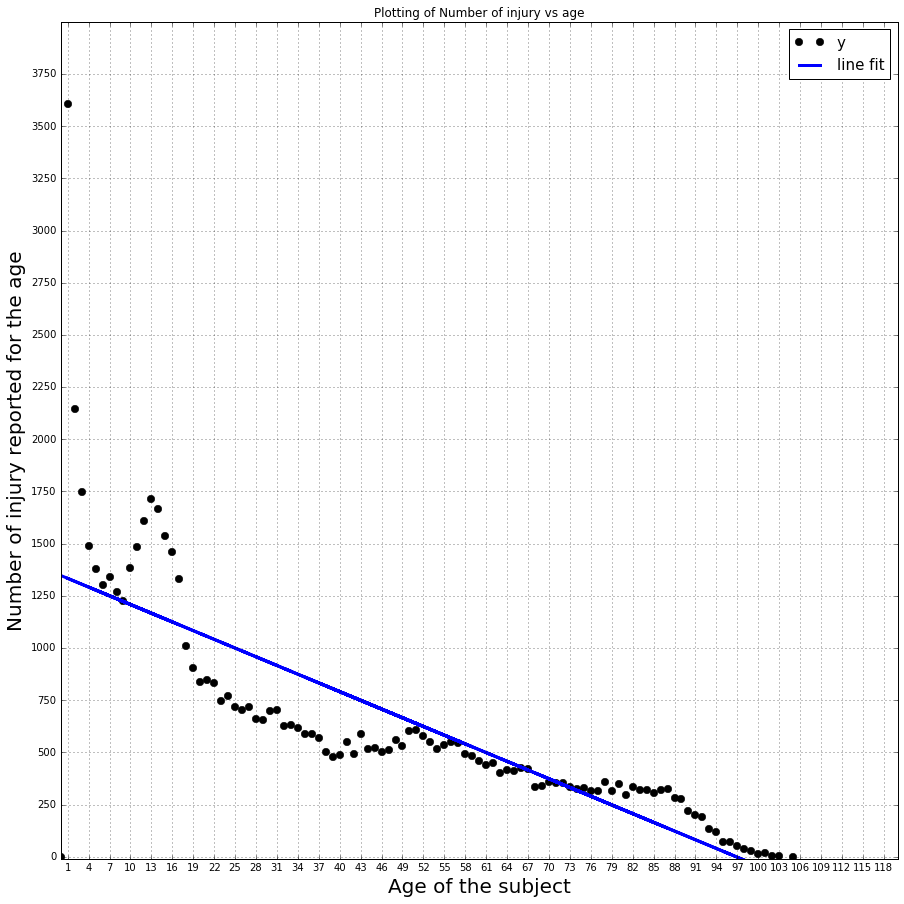

In [40]:
plt.figure(figsize=(15,15))
plt.plot(N_age.x, N_age.y, 'k.', markersize=15)
plt.plot(N_age.x[N_age.y.notnull() & N_age.x.notnull() ], 
        result1deg.predict(), lw = 3, label="line fit")
plt.title('Plotting of Number of injury vs age')
plt.xticks(range(1,120,3))
plt.ylim(-10,4000)
plt.yticks(range(0,4000,250))
plt.xlabel("Age of the subject", fontsize=20)
plt.ylabel("Number of injury reported for the age", fontsize=20)
plt.legend(fontsize=15, loc=1)
plt.grid()

# Observation : Hence we can see that for every one unit increase in the age the number accidents that are reported decreases by a factor of 6. 96 for a given year, in this case its 2014

# The equation we have is which relate age and accident reported is

##  Number of  accidents reported = 1347.5 - 6.957 * (Age of the person)


# Question 5+
Investigate the data however you like and discuss any interesting insights you can find in the data

In [41]:
## The weight also have a pattern to show.

np.sort(N_data.weight.unique())

array([   5.7174,    6.6704,   14.3089,   15.6716,   37.4149,   41.0402,
         45.1442,   50.1602,   56.4302,   74.3851,   80.0213,   81.576 ,
         82.3076,   87.296 ,   89.7336,   99.704 ,  112.1671])

In [42]:
N_weight = pd.DataFrame(N_data.weight.value_counts())
N_weight = N_weight.reset_index()
N_weight.columns = ['weight','count']


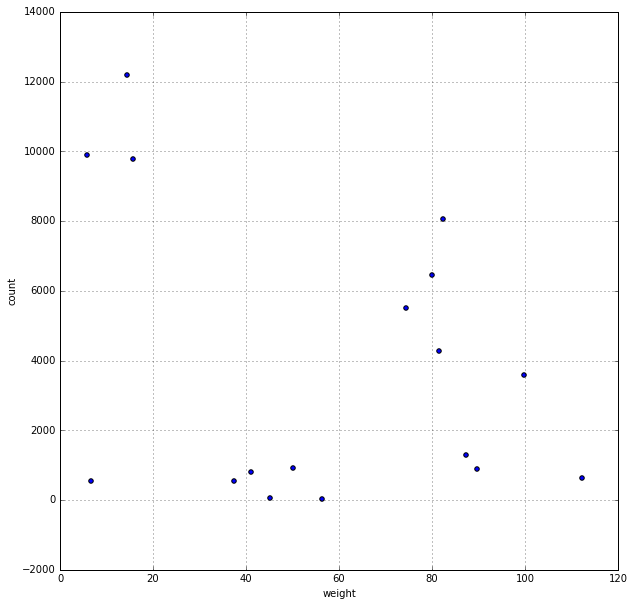

In [43]:
N_weight.plot(kind='scatter',x='weight',y='count',figsize=(10,10),fontsize=10)
plt.grid()

# Observation  :  The weight values are very unique for a 65k dataset , there is no specific trend to observe, but those individuals in weight range between 80 to 100 reported are as prone to accident as are very low weight individual 

In [44]:
N_data.race.value_counts()

White                               31676
None listed                         19593
Black/African American               9935
Other / Mixed Race                   3389
Asian                                 621
American Indian/Alaska Native         249
Native Hawaiian/Pacific Islander       36
Name: race, dtype: int64

# Observation : The white population has reported more accidents as compared to any other race.

In [45]:
## getting the day out of the date column

N_data['day'] = N_data.trmt_date.dt.dayofweek

In [46]:
##The day of the week with Monday=0, Sunday=6

N_data.day.value_counts()

5    9956
6    9872
0    9656
1    9088
2    9021
3    9019
4    8887
Name: day, dtype: int64

# Observation : The number of accident reported is maximum for Sunday and Saturday 

In [47]:
N_data.sex.value_counts()

Male      35503
Female    29996
Name: sex, dtype: int64

# Observation : The difference between number of male and number of female reporting injuries is not high . Though in the present dataset , number of males reporting an injury is higher than female

In [48]:
## location code  taking top 4: 0-Not recorder 1 - home, 9 - place of recreation and sports 
## source : NEISS coding manual 

N_data.location.value_counts()

1    28953
0    19245
9     8360
5     4072
8     3348
4     1483
2       18
6       15
7        5
Name: location, dtype: int64

# Observation : Most of the injuries observed at home followed by place of recreation and sports 

In [49]:
N_sex = pd.DataFrame(N_data.groupby(['sex','location'])['age'].count()).reset_index().rename(columns={'age':'count'})

In [50]:
## not taking unknown location into consideration 

N_sex[N_sex.location<>0].sort('count',ascending=False)[:6]

/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,sex,location,count
1,Female,1,15012
10,Male,1,13941
17,Male,9,5625
8,Female,9,2735
4,Female,5,2280
16,Male,8,2010


# Observation : More female get injured at home as compared to Male and more Male get injured in place of recreation and sports as compared to Female 


# Limitation : Larger data set could have helping building good model to see relationship between age and injuries 